<a href="https://www.kaggle.com/code/abdallahhelal/house-price-predication?scriptVersionId=224632796" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

<a id="top"></a>
<div style="text-align: center; background: #EFB036; font-family: 'Montserrat', sans-serif; color: white; padding: 15px; font-size: 30px; font-weight: bold; line-height: 1; border-radius: 20px 20px 0 0; margin-bottom: 20px; box-shadow: 0px 4px 6px rgba(0, 0, 0, 0.2);">🏠House price predication 🏠</div>
<div style="text-align: center;">
    <img src="https://storage.googleapis.com/kaggle-media/competitions/House%20Prices/kaggle_5407_media_housesbanner.png">

</div>


<div style="text-align: center; background: #3B6790; font-family: 'Trebuchet MS', Arial, sans-serif; color: white; padding: 15px; font-size: 26px; font-weight: bold; line-height: 1; border-radius: 50% 0 50% 0 / 40px; margin-bottom: 20px; box-shadow: 0px 4px 6px rgba(0, 0, 0, 0.1);">Table of Contents</div>


<div style="font-size: 14px; font-family: Verdana; border: 2px solid #ccc; background-color: #F5F5F5; padding: 10px; border-radius: 10px; margin-bottom: 20px;">
  <ol>
    <li><a href="#Introduction"><b>Introduction</b></a></li>
    <li><a href="#Objective-and-Problem-Statement"><b>Objective and Problem Statement</b> 🙋</a></li>
    <li><a href="#Dataset-Overview"><b>Dataset Overview</b> 🔍</a></li>
    <li><a href="#Exploratory-Data-Analysis"><b>Exploratory Data Analysis (EDA)</b> 📊</a></li>
    <li><a href="#Data-Cleaning-and-Preprocessing"><b>Data Cleaning and Preprocessing</b> 🧹</a></li>
    <li><a href="#Feature-Engineering"><b>Feature Engineering</b> 🛠️</a></li>
    <li><a href="#Model-Selection-and-Training"><b>Model Selection and Training</b> 🤖</a></li>
    <li><a href="#Hyperparameter-Tuning"><b>Hyperparameter Tuning</b> ⚙️</a></li>
    
  </ol>
</div>


In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, FunctionTransformer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import PowerTransformer
from scipy import stats
from scipy.stats import skew

import statsmodels.api as sm

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


<!-- Stylish Introduction header -->
<div style="text-align: center; background: #3B6790; font-family: 'Trebuchet MS', Arial, sans-serif; color: white; padding: 15px; font-size: 26px; font-weight: bold; line-height: 1; border-radius: 50% 0 50% 0 / 40px; margin-bottom: 20px; box-shadow: 0px 4px 6px rgba(0, 0, 0, 0.1);">
  <h2 id="Introduction" style="margin: 0; font-size: 30px;">Introduction</h2>
</div>


</h2>

<p style="font-size: 16px; font-family: 'Arial', sans-serif; line-height: 1.6; color: #333;">
  Welcome to the <strong>House Prices - Advanced Regression Techniques</strong> project. In this project, we aim to build a model that predicts house prices based on various features, such as size, location, and condition. The steps we will follow include:
</p>

<ul style="font-size: 16px; font-family: 'Arial', sans-serif; line-height: 1.6; color: #333; margin-left: 20px;">
  <li><strong>Analyzing the dataset</strong> to uncover patterns (Exploratory Data Analysis - EDA).</li>
  <li><strong>Cleaning and preparing the data</strong> for modeling, ensuring it's ready for analysis.</li>
  <li><strong>Experimenting with different regression models</strong> to predict house prices accurately.</li>
  <li><strong>Hyperparameter tuning</strong> to optimize the model and improve its performance.</li>
  <li><strong>Evaluating model performance</strong> and identifying key insights to understand the impact of different features.</li>
</ul>


# <!-- Stylish Objective and Problem Statement header -->
<div style="text-align: center; background: #3B6790; font-family: 'Trebuchet MS', Arial, sans-serif; color: white; padding: 15px; font-size: 26px; font-weight: bold; line-height: 1; border-radius: 50% 0 50% 0 / 40px; margin-bottom: 20px; box-shadow: 0px 4px 6px rgba(0, 0, 0, 0.1);">
  <h2 id="Objective and Problem Statement" style="margin: 0; font-size: 30px;">Objective and Problem Statement</h2>
</div>




<p style="font-family: 'Arial', sans-serif; font-size: 16px; color: #333; line-height: 1.6;">
  <strong>Objective:</strong>  
  The primary objective of this project is to build a machine learning model that can predict house prices based on various features such as size, location, and condition. The model should provide accurate price estimates for properties, assisting real estate professionals, investors, and homeowners in making informed decisions.
</p>

<p style="font-family: 'Arial', sans-serif; font-size: 16px; color: #333; line-height: 1.6;">
  <strong>Problem Statement:</strong>  
  In the real estate market, house prices are influenced by a wide range of factors, including the number of rooms, the size of the property, its condition, location, and proximity to amenities such as schools and shops. Accurately predicting house prices is challenging due to the complex relationships between these factors. This project aims to leverage advanced regression techniques to model these interactions and identify the key drivers of house price variability.
</p>


<!-- Stylish Objective and Problem Statement header -->
<div style="text-align: center; background: #3B6790; font-family: 'Trebuchet MS', Arial, sans-serif; color: white; padding: 15px; font-size: 26px; font-weight: bold; line-height: 1; border-radius: 50% 0 50% 0 / 40px; margin-bottom: 20px; box-shadow: 0px 4px 6px rgba(0, 0, 0, 0.1);">
  <h2 id="Dataset-Overview" style="margin: 0; font-size: 30px;">Dataset Overview</h2>
</div>


In [2]:
df_train = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/train.csv")
df_test = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/test.csv")

In [3]:
print("TRAIN DATA SHAPE:", df_train.shape)
print("TEST DATA SHAPE:", df_test.shape)

TRAIN DATA SHAPE: (1460, 81)
TEST DATA SHAPE: (1459, 80)


In [4]:
print("First 5 rows of training data:")
df_train.head()


First 5 rows of training data:


Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [5]:
print("First 5 rows of test data:")
df_test.head()


First 5 rows of test data:


Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  1461          20       RH         80.0    11622   Pave   NaN      Reg   
1  1462          20       RL         81.0    14267   Pave   NaN      IR1   
2  1463          60       RL         74.0    13830   Pave   NaN      IR1   
3  1464          60       RL         78.0     9978   Pave   NaN      IR1   
4  1465         120       RL         43.0     5005   Pave   NaN      IR1   

  LandContour Utilities  ... ScreenPorch PoolArea PoolQC  Fence MiscFeature  \
0         Lvl    AllPub  ...         120        0    NaN  MnPrv         NaN   
1         Lvl    AllPub  ...           0        0    NaN    NaN        Gar2   
2         Lvl    AllPub  ...           0        0    NaN  MnPrv         NaN   
3         Lvl    AllPub  ...           0        0    NaN    NaN         NaN   
4         HLS    AllPub  ...         144        0    NaN    NaN         NaN   

  MiscVal MoSold  YrSold  SaleType  SaleCondition  
0       0      6    2010        WD         Normal  
1   12500      6    2010        WD         Normal  
2       0      3    2010        WD         Normal  
3       0      6    2010        WD         Normal  
4       0      1    2010        WD         Normal  

[5 rows x 80 columns]

<!-- Stylish Objective and Problem Statement header -->
<div style="text-align: center; background: #3B6790; font-family: 'Trebuchet MS', Arial, sans-serif; color: white; padding: 15px; font-size: 26px; font-weight: bold; line-height: 1; border-radius: 50% 0 50% 0 / 40px; margin-bottom: 20px; box-shadow: 0px 4px 6px rgba(0, 0, 0, 0.1);">
  <h2 id="Exploratory-Data-Analysis" style="margin: 0; font-size: 30px;">Exploratory Data Analysis</h2>
</div>


In [6]:
print("Training Data Info:")
df_train.info()

Training Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   i

In [7]:
print("Summary Statistics:")
df_train.describe()

Summary Statistics:


Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.645407   181.066207   456.098091  ...   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000  ...   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000  ...   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000  ...   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000  ...   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean     94.244521    46.660274      21.954110     3.409589    15.060959   
std     125.338794    66.256028      61.119149    29.317331    55.757415   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    25.000000       0.000000     0.000000     0.000000   
75%     168.000000    68.000000       0.000000     0.000000     0.000000   
max     857.000000   547.000000     552.000000   508.000000   480.000000   

          PoolArea       MiscVal       MoSold       YrSold      SalePrice  
count  1460.000000   1460.000000  1460.000000  1460.000000    1460.000000  
mean      2.758904     43.489041     6.321918  2007.815753  180921.195890  
std      40.177307    496.123024     2.703626     1.328095   79442.502883  
min       0.000000      0.000000     1.000000  2006.000000   34900.000000  
25%       0.000000      0.000000     5.000000  2007.000000  129975.000000  
50%       0.000000      0.000000     6.000000  2008.000000  163000.000000  
75%       0.000000      0.000000     8.000000  2009.000000  214000.000000  
max     738.000000  15500.000000    12.000000  2010.000000  755000.000000  

[8 rows x 38 columns]

🔹 **What is MSSubClass?**

It represents the type of dwelling (house structure) involved in the sale. Instead of a descriptive label, it uses numerical codes. 

In [8]:
df_train['MSSubClass'].value_counts()


MSSubClass
20     536
60     299
50     144
120     87
30      69
160     63
70      60
80      58
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: count, dtype: int64

In [9]:
df_train["MSSubClass"] = df_train["MSSubClass"].astype("category")
df_test["MSSubClass"] = df_test["MSSubClass"].astype("category")


In [10]:
rare_classes = [40, 180, 45, 75, 85, 190]
df_train["MSSubClass"] = df_train["MSSubClass"].replace(rare_classes, "Other")
df_test["MSSubClass"] = df_test["MSSubClass"].replace(rare_classes, "Other")


In [11]:
df_train['MSSubClass'].value_counts()


MSSubClass
20       536
60       299
50       144
Other     92
120       87
30        69
160       63
70        60
80        58
90        52
Name: count, dtype: int64

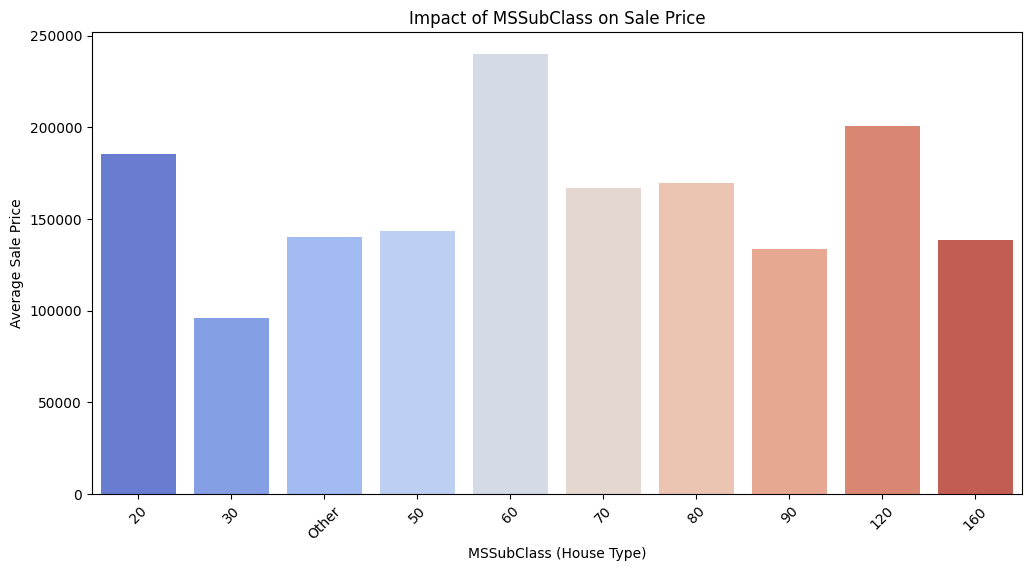

In [12]:


avg_prices = df_train.groupby("MSSubClass")["SalePrice"].mean().sort_values()

plt.figure(figsize=(12, 6))
sns.barplot(x=avg_prices.index, y=avg_prices.values, palette="coolwarm")
plt.xlabel("MSSubClass (House Type)")
plt.ylabel("Average Sale Price")
plt.title("Impact of MSSubClass on Sale Price")
plt.xticks(rotation=45)
plt.show()


The **`MSZoning`** column represents the general zoning classification 

In [13]:
df_train['MSZoning'].value_counts()

MSZoning
RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: count, dtype: int64

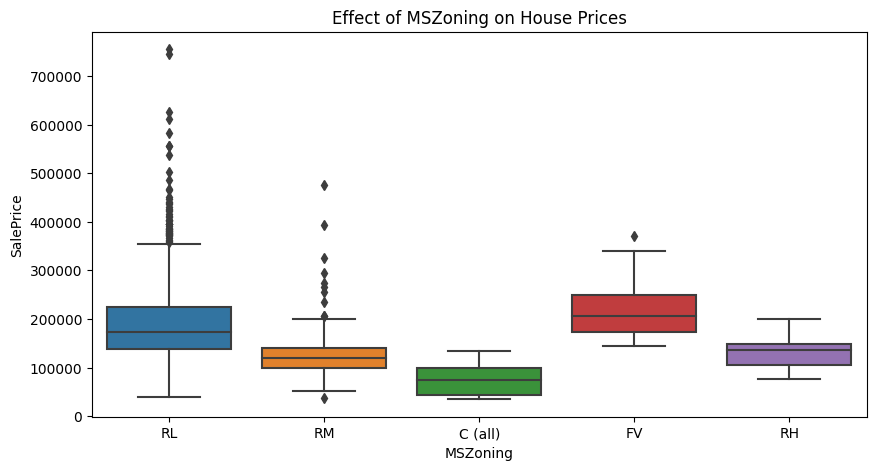

In [14]:
plt.figure(figsize=(10, 5))
sns.boxplot(x=df_train["MSZoning"], y=df_train["SalePrice"])
plt.title("Effect of MSZoning on House Prices")
plt.show()


In the description:  
- **`MoSold`** represents the **month** the house was sold (**MM format**).  
- **`YrSold`** represents the **year** the house was sold (**YYYY format**).  
- **`MSSubClass`** is a **category** that identifies the type of dwelling.  

In the dataset:  
- **`MoSold`** and **`YrSold`** are stored as **integers (`int64`)**, even though they represent time-based categories.  
- **`MSSubClass`** is also stored as an **integer (`int64`)**, even though it represents different house types.  

🔹 Since **`MSSubClass` and `YrSold` are categorical** rather than numerical values, we will **convert them to categorical variables** for better analysis."

In [15]:
df_train['YrSold'] = df_train['YrSold'].apply(str)
df_train['MoSold'] = df_train['MoSold'].apply(str)
df_train['YrSold'] =df_train['YrSold'].astype(int)
df_train["MSSubClass"] = df_train["MSSubClass"].astype("object")


df_test['YrSold'] = df_test['YrSold'].apply(str)
df_test['MoSold'] = df_test['MoSold'].apply(str)
df_test['YrSold'] =df_test['YrSold'].astype(int)
df_test["MSSubClass"] = df_test["MSSubClass"].astype("object")


<!-- Stylish Objective and Problem Statement header -->
<div style="text-align: center; background: #4C7B8B; font-family: 'Trebuchet MS', Arial, sans-serif; color: white; padding: 15px; font-size: 26px; font-weight: bold; line-height: 1; border-radius: 50% 0 50% 0 / 40px; margin-bottom: 20px; box-shadow: 0px 4px 6px rgba(0, 0, 0, 0.1);">
  <h3 id="Sales" style="margin: 0; font-size: 25px;">Analysing SalePrice</h3>
</div>


In [16]:
df_train['SalePrice'].describe()


count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

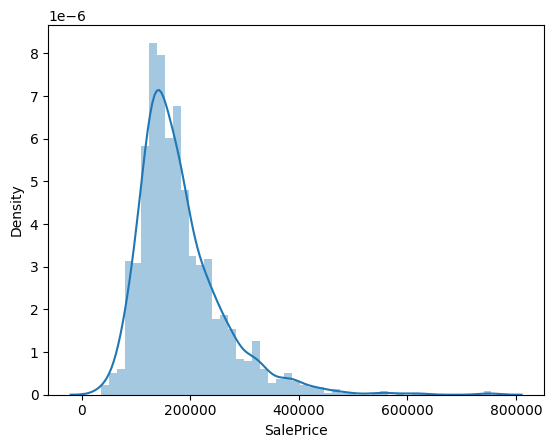

In [17]:
sns.distplot(df_train['SalePrice'])

plt.show()

In [18]:
print("Skewness: %f" % df_train['SalePrice'].skew())
print("Kurtosis: %f" % df_train['SalePrice'].kurt())

Skewness: 1.882876
Kurtosis: 6.536282


**Skewness = 1.88:** 
* This indicates a positive skew (right skew) in the SalePrice distribution.
* The data has a longer right tail, with most values concentrated on the lower end, while a few high values stretch out towards the right.

**Kurtosis = 6.54:** 
* This value suggests a leptokurtic distribution, meaning the data has heavy tails and contains outliers.
* The presence of extreme values indicates that the distribution is more peaked and has significant deviations from the normal distribution, especially with more outliers in the higher ranges.

### Relationship with numerical variables

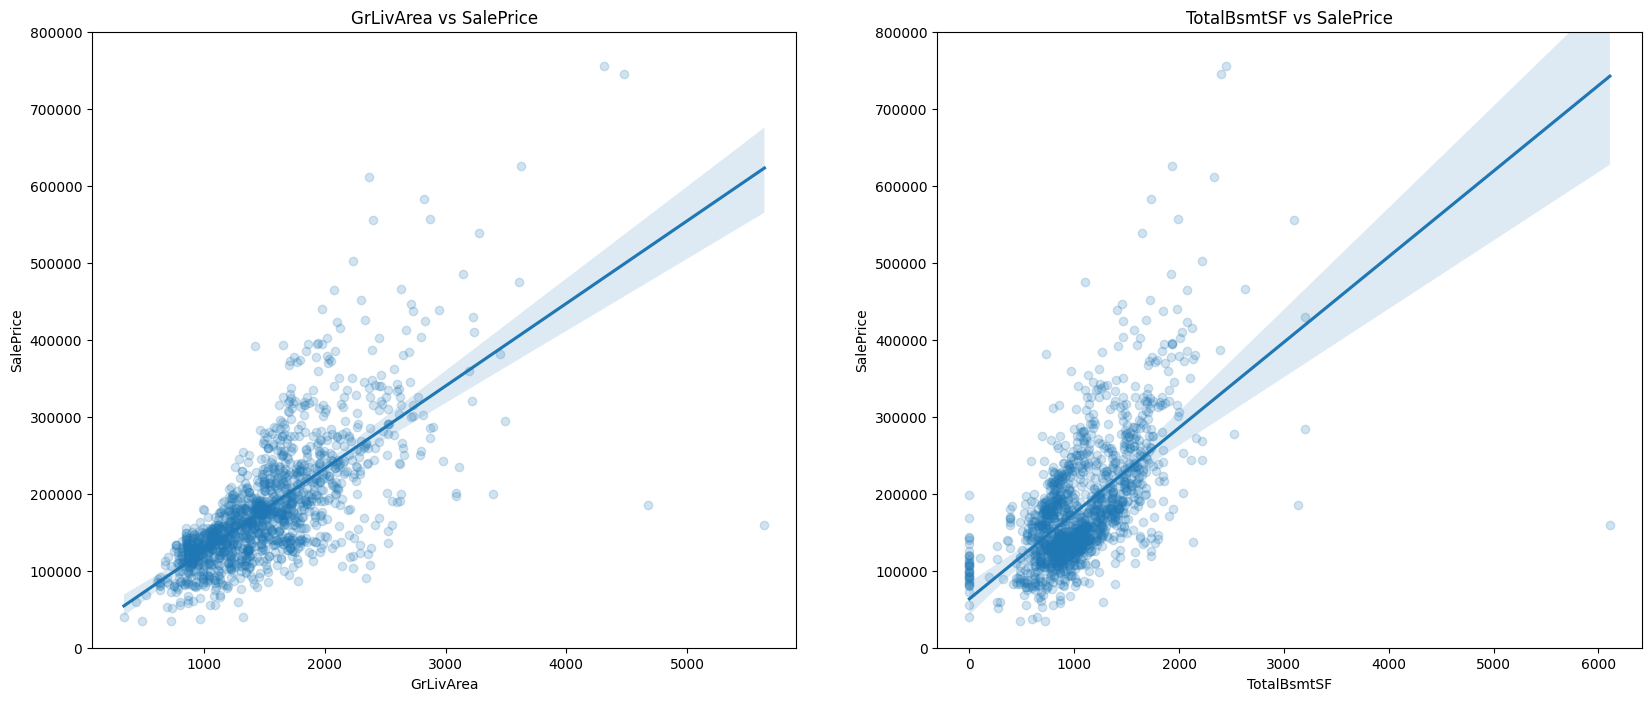

In [19]:
figure, ax = plt.subplots(1,2, figsize = (20,8))
sns.regplot(x='GrLivArea', y='SalePrice',data = df_train, scatter_kws={'alpha':0.2} , ax = ax[0])
sns.regplot(x='TotalBsmtSF', y='SalePrice',data = df_train, scatter_kws={'alpha':0.2} , ax = ax[1])
ax[0].set_ylim(0, 800000)
ax[1].set_ylim(0, 800000)

ax[0].set_title("GrLivArea vs SalePrice")
ax[1].set_title("TotalBsmtSF vs SalePrice")
plt.show()

`SalePrice` and `GrLivArea` are closely related. When `GrLivArea` gets bigger, `SalePrice` also goes up in a clear pattern.

The relationship between `TotalBsmtSF` and `SalePrice` is mostly linear, but at some point, the price suddenly jumps, possibly in an exponential way. Also, when `TotalBsmtSF` is zero, `SalePrice` tends to be very low, showing that a basement is important for home value.



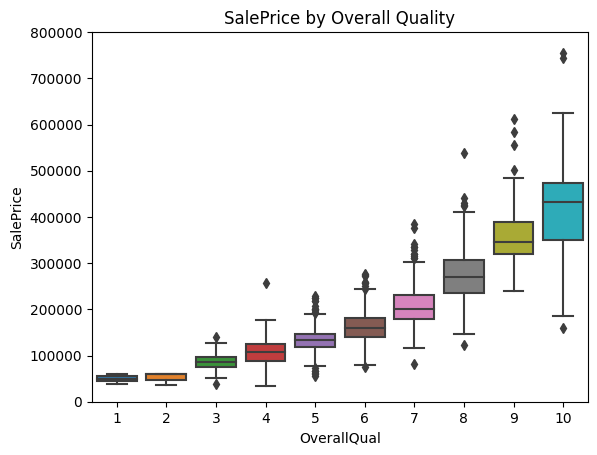

In [20]:
sns.boxplot(x="OverallQual", y="SalePrice", data=df_train)
plt.ylim(0, 800000)
plt.title("SalePrice by Overall Quality")

plt.show()

* Shows a strong positive correlation between house quality and price

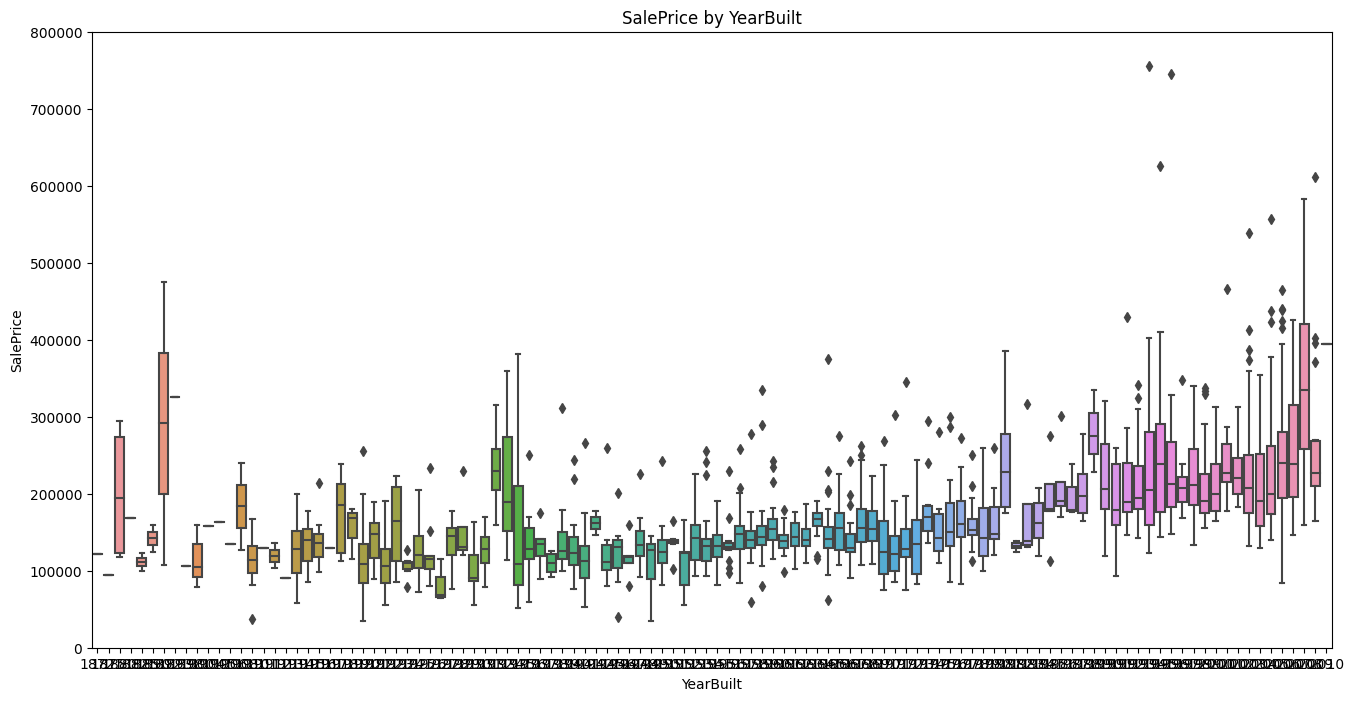

In [21]:
plt.figure(figsize=(16, 8))

sns.boxplot(x="YearBuilt", y="SalePrice", data=df_train)

plt.ylim(0, 800000)
plt.title("SalePrice by YearBuilt")

plt.show()


Although it’s not very clear, it seems that newer houses tend to cost more than older ones.

Note: We’re not sure if `SalePrice` has been adjusted for inflation. Inflation means that money’s value changes over time. If `SalePrice` isn’t adjusted, it could make older houses look cheaper, even if they are actually worth less.


### Summary of House Price Analysis

Although it’s not very clear, it seems that newer houses tend to cost more than older ones.  

Note: We’re not sure if `SalePrice` is adjusted for inflation. If it’s not, inflation might make old houses appear cheaper, even though their value is really lower.

### Summary

Here’s what we can conclude:

- **GrLivArea** (the space above ground) and **TotalBsmtSF** (basement size) have a positive relationship with `SalePrice`. This means that as one increases, the other also increases. The effect of basement size is especially strong.
- **OverallQual** (the overall quality of the house) and **YearBuilt** (year the house was built) also affect `SalePrice`. The quality of the house has a stronger effect, as shown by the box plot where higher quality leads to higher prices.
- We’ve only looked at four variables, but there are many more to analyze. The key is picking the right features (feature selection), not necessarily making new, complex relationships (feature engineering).

Now, it’s time to focus on the important variables.


<!-- Stylish Objective and Problem Statement header -->
<div style="text-align: center; background: #4C7B8B; font-family: 'Trebuchet MS', Arial, sans-serif; color: white; padding: 15px; font-size: 26px; font-weight: bold; line-height: 1; border-radius: 50% 0 50% 0 / 40px; margin-bottom: 20px; box-shadow: 0px 4px 6px rgba(0, 0, 0, 0.1);">
  <h3 id="Sales" style="margin: 0; font-size: 25px;"> Looking for Correlations
</h3>
</div>


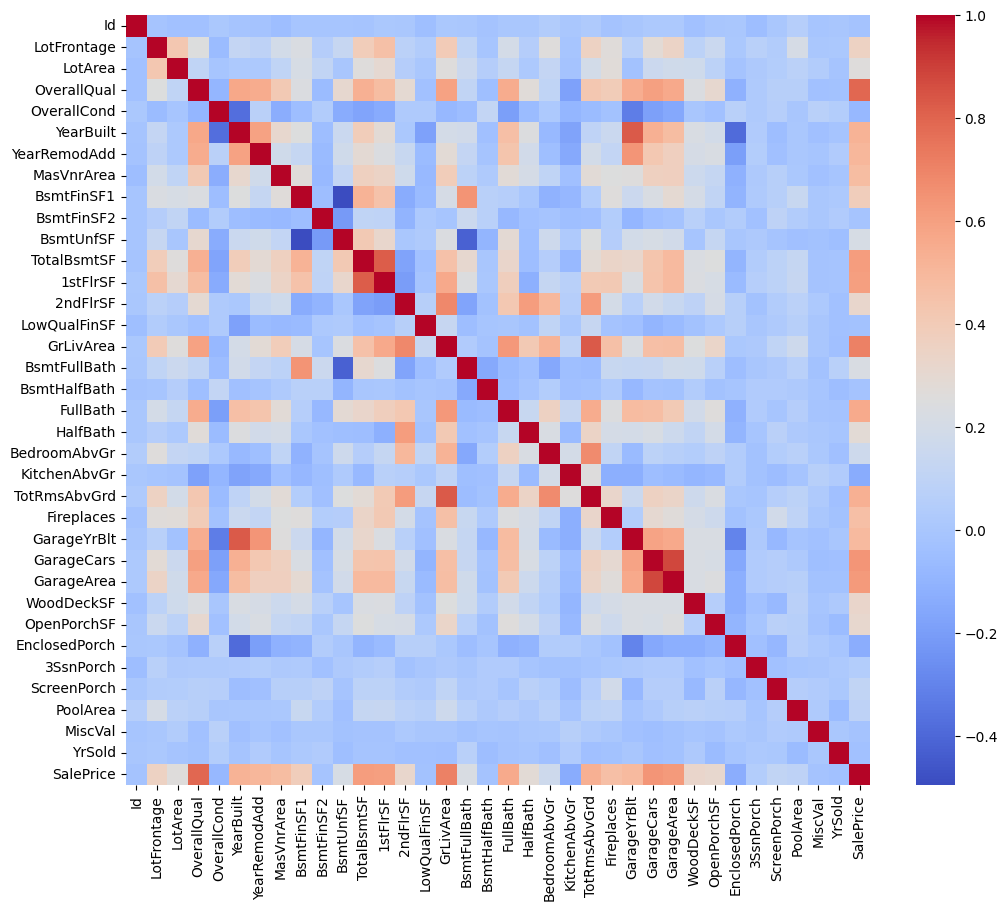

In [22]:
#correlation matrix
corrmat = df_train.select_dtypes(include=["number"]).corr()
plt.figure(figsize=(12, 10))

sns.heatmap(corrmat , cmap = 'coolwarm')
plt.show()

### ✖️ **Removing Highly Correlated Features**  

Some features are strongly correlated, meaning they provide similar information.  
Keeping both can make the model complex and introduce multicollinearity, **which can lead to unstable predictions**.  
To simplify the model, we keep only the most representative features.  

- **GarageArea & GarageCars** (**0.88 correlation**)  
  → Keeping **GarageArea**, as it represents the actual size of the garage, which is more informative than just car capacity.  

- **TotalBsmtSF & 1stFlrSF** (**0.82 correlation**)  
  → Keeping **TotalBsmtSF**, as it includes basement space, making it a better indicator of total house area.  

- **TotRmsAbvGrd & GrLivArea** (**0.83 correlation**)  
  → Keeping **GrLivArea**, as it represents total living space and is more directly related to house value.  


In [23]:
drop_cols = ['GarageCars', '1stFlrSF', 'TotRmsAbvGrd']

df_train = df_train.drop(columns=drop_cols)

df_test = df_test.drop(columns=drop_cols)


### Focus on Top **Correlated** Features with SalePrice

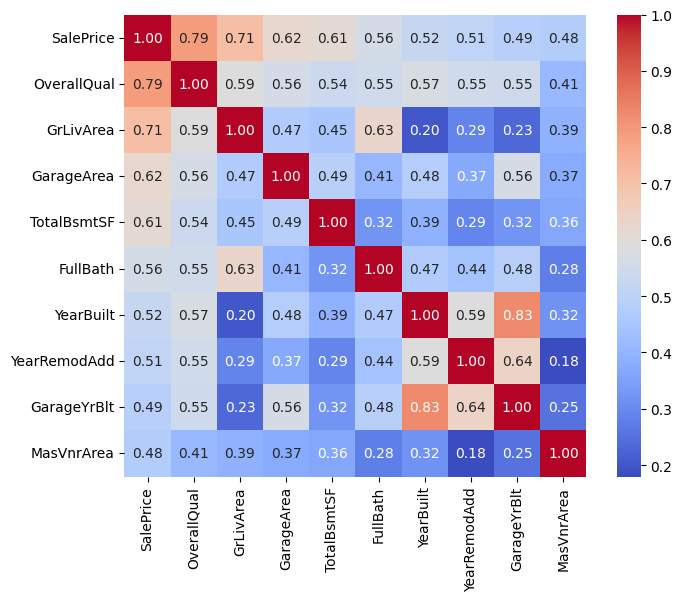

In [24]:
corrmat = df_train.select_dtypes(include=["number"]).corr()

cols = corrmat.nlargest(10, 'SalePrice')['SalePrice'].index
cm = df_train[cols].corr()
plt.figure(figsize=(8, 6))


sns.heatmap(cm , annot=True, square=True, fmt='.2f', annot_kws={'size': 10} ,cmap = 'coolwarm')
plt.show()

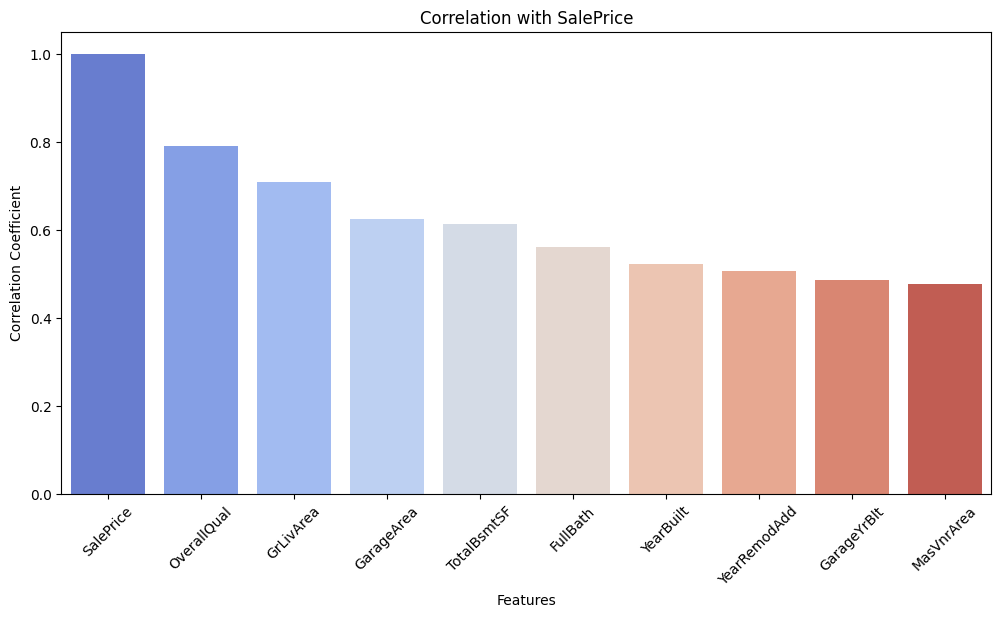

In [25]:
corr_with_saleprice = cm["SalePrice"]
plt.figure(figsize=(12, 6))

sns.barplot(x=corr_with_saleprice.index, y=corr_with_saleprice.values, palette="coolwarm")
plt.xticks(rotation=45)
plt.title("Correlation with SalePrice")
plt.xlabel("Features")
plt.ylabel("Correlation Coefficient")
plt.show()

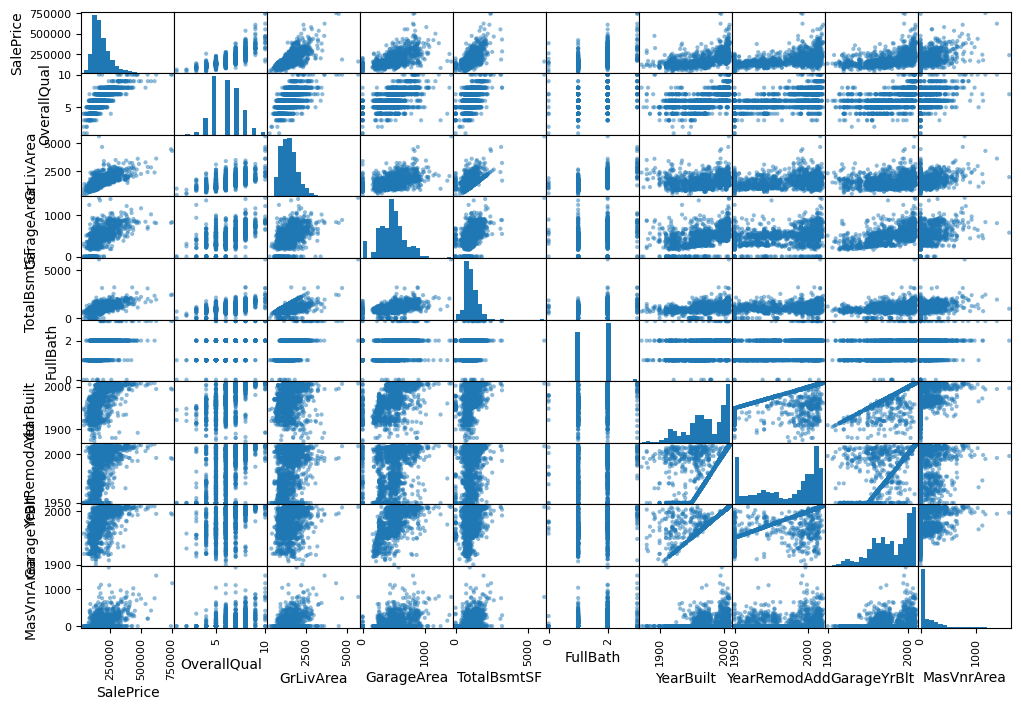

In [26]:
from pandas.plotting import scatter_matrix

scatter_matrix(df_train[cols], figsize=(12, 8) , hist_kwds={'bins': 20})
plt.show()

The scatter plot gives us insights into relationships between variables like `TotalBsmtSF` and `GrLivArea`, where the basement area rarely exceeds the living area. It also shows that house prices are **increasing faster in recent years**, especially when compared to older houses.


<!-- Stylish Objective and Problem Statement header -->
<div style="text-align: center; background: #3B6790; font-family: 'Trebuchet MS', Arial, sans-serif; color: white; padding: 15px; font-size: 26px; font-weight: bold; line-height: 1; border-radius: 50% 0 50% 0 / 40px; margin-bottom: 20px; box-shadow: 0px 4px 6px rgba(0, 0, 0, 0.1);">
  <h2 id="Data-Cleaning-and-Preprocessing" style="margin: 0; font-size: 30px;">Data Cleaning and Preprocessing</h2>
</div>


<!-- Stylish Objective and Problem Statement header -->
<div style="text-align: center; background: #4C7B8B; font-family: 'Trebuchet MS', Arial, sans-serif; color: white; padding: 15px; font-size: 26px; font-weight: bold; line-height: 1; border-radius: 50% 0 50% 0 / 40px; margin-bottom: 20px; box-shadow: 0px 4px 6px rgba(0, 0, 0, 0.1);">
  <h3 id="Sales" style="margin: 0; font-size: 25px;"> Msing Data
</h3>
</div>


In [27]:
# Separating Target and Features

target = df_train['SalePrice']
test_ids = df_test['Id']
test = df_test.drop(['Id'],axis = 1)
train = df_train.drop(['Id','SalePrice'], axis = 1)

In [28]:
print("TEST DATA SHAPE:", test.shape)
print("TEST DATA SHAPE:", test_ids.shape)

TEST DATA SHAPE: (1459, 76)
TEST DATA SHAPE: (1459,)


In [29]:
total = train.isnull().sum().sort_values(ascending=False)
percent = (train.isnull().sum() / train.shape[0]).sort_values(ascending=False)

Usability = pd.Series(np.where(percent > 0.20, 'Discard', 'Keep'), index=percent.index)

missing_data = pd.concat([total, percent, Usability], axis=1, keys=['Total', 'Percent', 'Usability'])
missing_data.head(20)

Total   Percent Usability
PoolQC         1453  0.995205   Discard
MiscFeature    1406  0.963014   Discard
Alley          1369  0.937671   Discard
Fence          1179  0.807534   Discard
MasVnrType      872  0.597260   Discard
FireplaceQu     690  0.472603   Discard
LotFrontage     259  0.177397      Keep
GarageCond       81  0.055479      Keep
GarageType       81  0.055479      Keep
GarageYrBlt      81  0.055479      Keep
GarageQual       81  0.055479      Keep
GarageFinish     81  0.055479      Keep
BsmtFinType2     38  0.026027      Keep
BsmtExposure     38  0.026027      Keep
BsmtFinType1     37  0.025342      Keep
BsmtCond         37  0.025342      Keep
BsmtQual         37  0.025342      Keep
MasVnrArea        8  0.005479      Keep
Electrical        1  0.000685      Keep
BedroomAbvGr      0  0.000000      Keep

In [30]:
# Drop columns where "Usability" is "Discard"
features_to_remove = missing_data[missing_data["Usability"] == "Discard"].index.to_list()


# Remove these columns from the dataset
train = train.drop(columns=features_to_remove)
test  = test.drop(columns=features_to_remove)



# Print removed features
print("Dropped features:", features_to_remove)


Dropped features: ['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'MasVnrType', 'FireplaceQu']


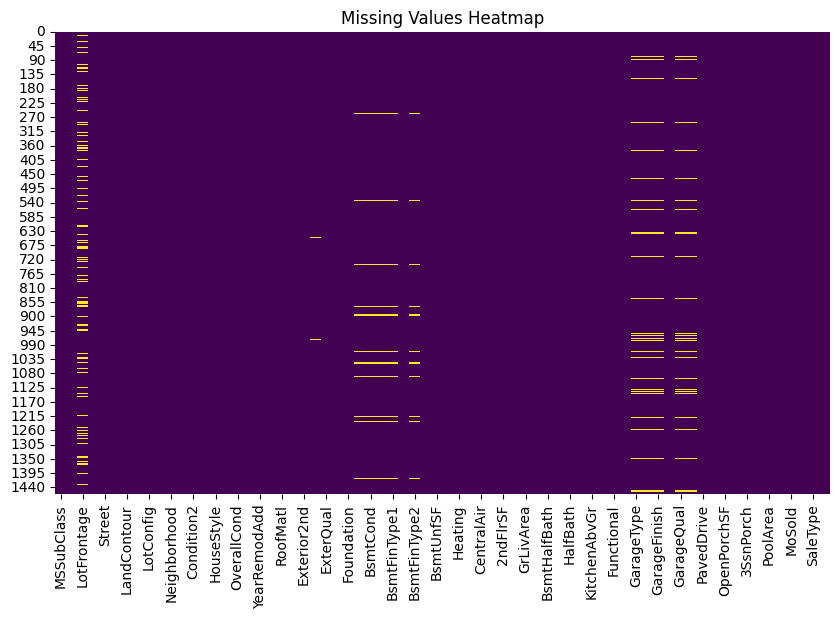

In [31]:
plt.figure(figsize=(10, 6))
sns.heatmap(train.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Values Heatmap")
plt.show()

### 🔍 Handling Missing Values: Are They Really Missing?  

Before treating all **NaN (missing) values** as actual missing data, we need to **check their meaning**. Many missing values in the dataset actually represent the **absence of a feature** rather than missing data.  

For example, let's look at the **"Alley"** column:  

| **Feature** | **Description** |
|------------|---------------|
| `Grvl`  | Gravel alley access |
| `Pave`  | Paved alley access |
| `NA`    | **No alley access** (not missing, just absent) |

👉 **Solution:** Instead of treating `NA` as missing data, we should **replace it with "NoAlley"** to preserve information.



## Filling Missing Categorical Values `(Based on the Description File)`

### 🏠 GarageType - Meaning of NaN

In this column, **NaN means "No Garage"** rather than missing data.

### 🚗 GarageType Categories:
- **2Types** → More than one type of garage  
- **Attchd** → Attached to home  
- **Basment** → Basement Garage  
- **BuiltIn** → Built-In (Garage part of house - typically has room above garage)  
- **CarPort** → Car Port  
- **Detchd** → Detached from home  
- **NA (NaN)** → No Garage  


### 🚨 NaN Mean "No Value"

In this column, **NaN represents missing data**, not a specific category.

### 🏡 Functional - Home Functionality:
- **Typ** → Typical Functionality  
- **Min1** → Minor Deductions 1  
- **Min2** → Minor Deductions 2  
- **Mod** → Moderate Deductions  
- **Maj1** → Major Deductions 1  
- **Maj2** → Major Deductions 2  
- **Sev** → Severely Damaged  
- **Sal** → Salvage Only  


In [32]:
# Define columns for different strategies
none_fill_cols = ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'BsmtQual', 
                  'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']
zero_fill_cols = ['GarageArea']
mode_fill_cols = ['Functional', 'KitchenQual', 'Electrical', 'Exterior1st', 'Exterior2nd', 'SaleType', 'MSZoning']
median_fill_cols = ['LotFrontage', 'MasVnrArea','GarageYrBlt']
dropna_cols = ['BsmtFullBath', 'BsmtHalfBath', 'Utilities', 'TotalBsmtSF', 'BsmtUnfSF', 'BsmtFinSF2', 'BsmtFinSF1']


In [33]:
print("Missing values in train dataset:")
print(train.isnull().sum()[train.isnull().sum() > 0])

print("\nMissing values in test dataset:")
print(test.isnull().sum()[test.isnull().sum() > 0])


Missing values in train dataset:
LotFrontage     259
MasVnrArea        8
BsmtQual         37
BsmtCond         37
BsmtExposure     38
BsmtFinType1     37
BsmtFinType2     38
Electrical        1
GarageType       81
GarageYrBlt      81
GarageFinish     81
GarageQual       81
GarageCond       81
dtype: int64

Missing values in test dataset:
MSZoning          4
LotFrontage     227
Utilities         2
Exterior1st       1
Exterior2nd       1
MasVnrArea       15
BsmtQual         44
BsmtCond         45
BsmtExposure     44
BsmtFinType1     42
BsmtFinSF1        1
BsmtFinType2     42
BsmtFinSF2        1
BsmtUnfSF         1
TotalBsmtSF       1
BsmtFullBath      2
BsmtHalfBath      2
KitchenQual       1
Functional        2
GarageType       76
GarageYrBlt      78
GarageFinish     78
GarageArea        1
GarageQual       78
GarageCond       78
SaleType          1
dtype: int64


In [34]:
train[none_fill_cols] = train[none_fill_cols].fillna('None')
train[zero_fill_cols] = train[zero_fill_cols].fillna(0)
train[mode_fill_cols] = train[mode_fill_cols].fillna(train[mode_fill_cols].mode().iloc[0])
train[median_fill_cols] = train[median_fill_cols].fillna(train[median_fill_cols].median())

# Drop rows with NaN in dropna_cols
train = train.dropna(subset=dropna_cols)

# Repeat the same for test set
test[none_fill_cols] = test[none_fill_cols].fillna('None')
test[zero_fill_cols] = test[zero_fill_cols].fillna(0)
test[mode_fill_cols] = test[mode_fill_cols].fillna(test[mode_fill_cols].mode().iloc[0])
test[median_fill_cols] = test[median_fill_cols].fillna(test[median_fill_cols].median())

In [35]:
print("Missing values in train dataset:", end= " ")
print(train.isnull().any().sum())

print("\nMissing values in test dataset:" , end= " ")
print(test.isnull().any().sum())


Missing values in train dataset: 0

Missing values in test dataset: 7


<!-- Stylish Objective and Problem Statement header -->
<div style="text-align: center; background: #4C7B8B; font-family: 'Trebuchet MS', Arial, sans-serif; color: white; padding: 15px; font-size: 26px; font-weight: bold; line-height: 1; border-radius: 50% 0 50% 0 / 40px; margin-bottom: 20px; box-shadow: 0px 4px 6px rgba(0, 0, 0, 0.1);">
  <h3 id="Sales" style="margin: 0; font-size: 25px;">Bivariate analysis </h3>
</div>


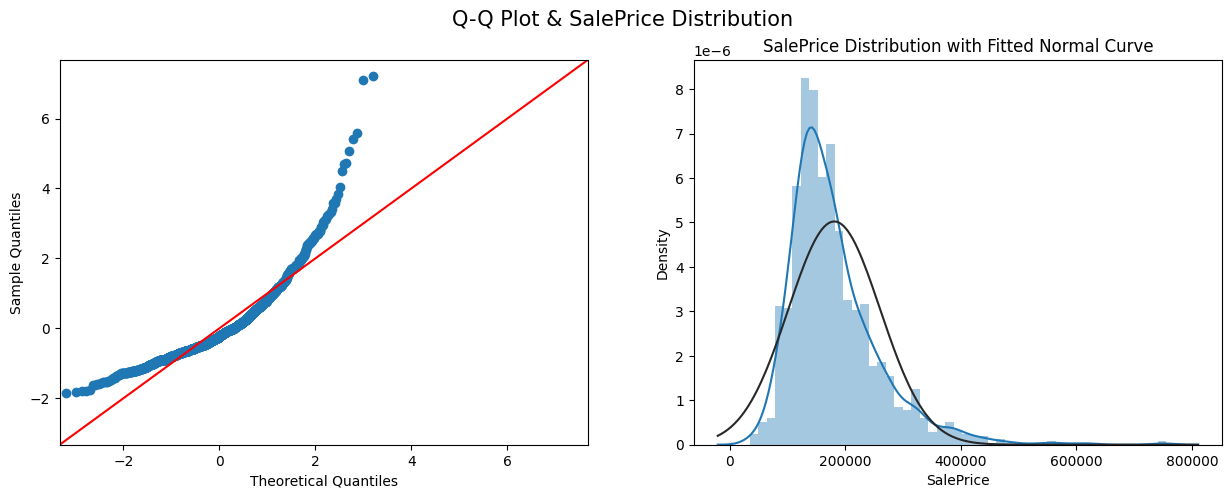

In [36]:
fig, ax = plt.subplots(1,2, figsize= (15,5))
fig.suptitle("Q-Q Plot & SalePrice Distribution", fontsize=15)

sns.distplot(target, fit=norm , ax= ax[1])

sm.qqplot(target, stats.t,fit=True, line="45", ax = ax[0])
plt.title('SalePrice Distribution with Fitted Normal Curve')
plt.xlabel('SalePrice')
plt.ylabel('Density')
plt.show()


`SalePrice` is not normal, showing peakedness and positive skewness, but a simple log transformation can fix this.

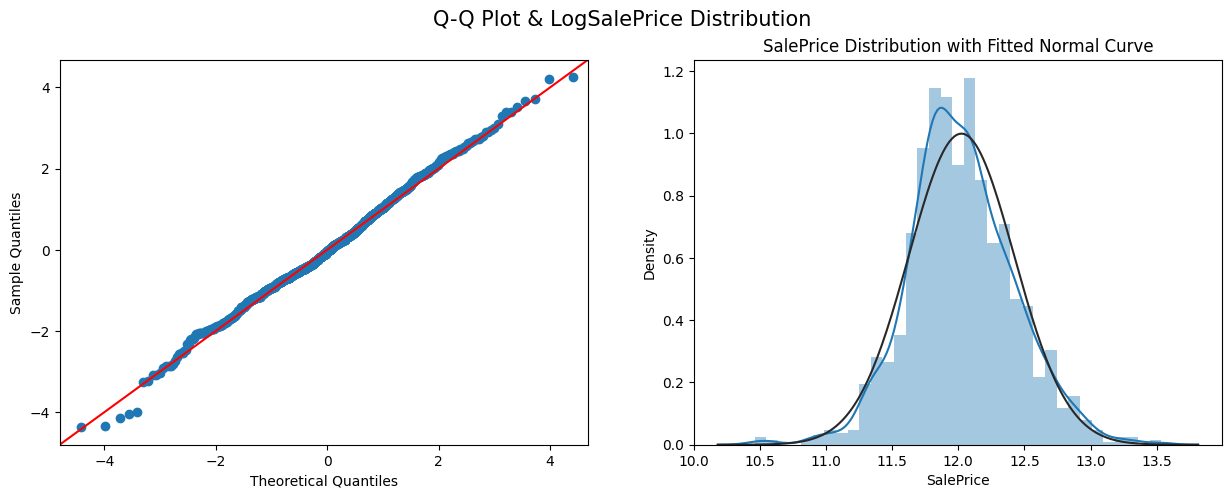

In [37]:
target_log  = np.log(df_train['SalePrice'])
fig, ax = plt.subplots(1,2, figsize= (15,5))
fig.suptitle("Q-Q Plot & LogSalePrice Distribution", fontsize=15)

sns.distplot(target_log, fit=norm , ax= ax[1])

sm.qqplot(target_log, stats.t,fit=True, line="45", ax = ax[0])
plt.title('SalePrice Distribution with Fitted Normal Curve')
plt.xlabel('SalePrice')
plt.ylabel('Density')
plt.show()



<!-- Stylish Objective and Problem Statement header -->
<div style="text-align: center; background: #3B6790; font-family: 'Trebuchet MS', Arial, sans-serif; color: white; padding: 15px; font-size: 26px; font-weight: bold; line-height: 1; border-radius: 50% 0 50% 0 / 40px; margin-bottom: 20px; box-shadow: 0px 4px 6px rgba(0, 0, 0, 0.1);">
  <h2 id="Feature-Engineering" style="margin: 0; font-size: 30px;">Feature Engineering </h2>
</div>


<!-- Stylish Objective and Problem Statement header -->
<div style="text-align: center; background: #4C7B8B; font-family: 'Trebuchet MS', Arial, sans-serif; color: white; padding: 15px; font-size: 26px; font-weight: bold; line-height: 1; border-radius: 50% 0 50% 0 / 40px; margin-bottom: 20px; box-shadow: 0px 4px 6px rgba(0, 0, 0, 0.1);">
  <h3 id="Sales" style="margin: 0; font-size: 25px;">Feature Creation :  </h3>
    <h6 id="Sales" style="margin: 0; font-size: 11px;">Developing new features from the raw data.  </h6>
</div>


In [38]:
train['Total_Bathrooms'] = (
    train['FullBath'] + 
    (0.5 * train['HalfBath'] + 
    train['BsmtFullBath']+ 
    (0.5 * train['BsmtHalfBath']))

)

test['Total_Bathrooms'] = (
    test['FullBath'] + 
    (0.5 * test['HalfBath'] + 
    test['BsmtFullBath']+ 
    (0.5 * test['BsmtHalfBath']))

)


In [39]:
train["SqFtPerRoom"] = train["GrLivArea"] / (
    train["FullBath"] + train["HalfBath"] + train["KitchenAbvGr"] + train["BedroomAbvGr"]
)
test["SqFtPerRoom"] = test["GrLivArea"] / (
    test["FullBath"] + test["HalfBath"] + test["KitchenAbvGr"] + train["BedroomAbvGr"]
)


In [40]:
train['TotalSF'] = train['TotalBsmtSF']  + train['2ndFlrSF']
train['Has_Basement'] = (train['TotalBsmtSF'] > 0).astype(int)

test['TotalSF'] = test['TotalBsmtSF']  + test['2ndFlrSF']
test['Has_Basement'] = (test['TotalBsmtSF'] > 0).astype(int)


In [41]:
train['House_Age'] = train['YrSold'] - train['YearBuilt']

test['House_Age'] = test['YrSold'] - test['YearBuilt']


In [42]:
train['Overall_House_Score'] = train['OverallQual'] * train['OverallCond']
train['PorchSF'] = (train['OpenPorchSF'] + train['EnclosedPorch'] +
                         train['3SsnPorch'] + train['ScreenPorch'])

test['Overall_House_Score'] = test['OverallQual'] * test['OverallCond']
test['PorchSF'] = (test['OpenPorchSF'] + test['EnclosedPorch'] +
                         test['3SsnPorch'] + test['ScreenPorch'])


<!-- Stylish Objective and Problem Statement header -->
<div style="text-align: center; background: #4C7B8B; font-family: 'Trebuchet MS', Arial, sans-serif; color: white; padding: 15px; font-size: 26px; font-weight: bold; line-height: 1; border-radius: 50% 0 50% 0 / 40px; margin-bottom: 20px; box-shadow: 0px 4px 6px rgba(0, 0, 0, 0.1);">
  <h3 id="Sales" style="margin: 0; font-size: 25px;">Feature Transformation:  </h3>
    <h6 id="Sales" style="margin: 0; font-size: 11px;">Modifying features to enhance their
relationship with the target variable:  </h6>
</div>


In [43]:
# Select numerical features only
numerical_features = train.select_dtypes(include=[np.number])

# Calculate skewness
skewness = numerical_features.skew().sort_values(ascending=False)

high_skew_features = skewness[abs(skewness) > 0.75].index.tolist()
print("Highly skewed features:", high_skew_features)



Highly skewed features: ['MiscVal', 'PoolArea', 'LotArea', '3SsnPorch', 'LowQualFinSF', 'KitchenAbvGr', 'BsmtFinSF2', 'ScreenPorch', 'BsmtHalfBath', 'EnclosedPorch', 'SqFtPerRoom', 'MasVnrArea', 'LotFrontage', 'OpenPorchSF', 'PorchSF', 'BsmtFinSF1', 'WoodDeckSF', 'TotalBsmtSF', 'GrLivArea', 'TotalSF', 'BsmtUnfSF', '2ndFlrSF', 'Has_Basement']


In [44]:
train[high_skew_features] = np.log1p(train[high_skew_features])
test[high_skew_features] = np.log1p(test[high_skew_features])


In [45]:
print(train[high_skew_features].skew())  # Check if skewness is reduced


MiscVal           5.170704
PoolArea         14.363102
LotArea          -0.137404
3SsnPorch         7.734975
LowQualFinSF      7.460317
KitchenAbvGr      3.869414
BsmtFinSF2        2.523694
ScreenPorch       3.150409
BsmtHalfBath      3.933064
EnclosedPorch     2.112275
SqFtPerRoom       0.781975
MasVnrArea        0.503532
LotFrontage      -0.870006
OpenPorchSF      -0.023397
PorchSF          -0.513090
BsmtFinSF1       -0.618410
WoodDeckSF        0.153537
TotalBsmtSF      -5.154670
GrLivArea        -0.006140
TotalSF          -5.819917
BsmtUnfSF        -2.186504
2ndFlrSF          0.289643
Has_Basement     -6.046534
dtype: float64


In [46]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Select numerical and categorical features
numerical_features = train.select_dtypes(include=[np.number]).columns.tolist()
categorical_features = train.select_dtypes(exclude=[np.number]).columns.tolist()

print("Numerical Features:", numerical_features)
print("*"*50)
print("\nCategorical Features:", categorical_features)


Numerical Features: ['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 'GarageYrBlt', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'YrSold', 'Total_Bathrooms', 'SqFtPerRoom', 'TotalSF', 'Has_Basement', 'House_Age', 'Overall_House_Score', 'PorchSF']
**************************************************

Categorical Features: ['MSSubClass', 'MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC',

In [47]:
scaler = StandardScaler()
train[numerical_features] = scaler.fit_transform(train[numerical_features])
test[numerical_features] = scaler.transform(test[numerical_features]) 

In [48]:
# Convert categorical features to strings
train[categorical_features] = train[categorical_features].astype(str)
test[categorical_features] = test[categorical_features].astype(str)


In [49]:
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)  # Avoid issues with unseen categories

# Fit and transform training data
train_encoded = encoder.fit_transform(train[categorical_features])
test_encoded = encoder.transform(test[categorical_features])  # Apply same transformation to test

# Convert to DataFrame
train_encoded = pd.DataFrame(train_encoded, columns=encoder.get_feature_names_out(categorical_features))
test_encoded = pd.DataFrame(test_encoded, columns=encoder.get_feature_names_out(categorical_features))

# Reset index
train_encoded.index = train.index
test_encoded.index = test.index

# Drop original categorical columns and concatenate encoded ones
train = train.drop(columns=categorical_features).join(train_encoded)
test = test.drop(columns=categorical_features).join(test_encoded)

In [50]:
train.head()

LotFrontage   LotArea  OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
0    -0.078896 -0.133270     0.651479    -0.517200   1.050994      0.878668   
1     0.572719  0.113413    -0.071836     2.179628   0.156734     -0.429577   
2     0.062541  0.420049     0.651479    -0.517200   0.984752      0.830215   
3    -0.329561  0.103317     0.651479    -0.517200  -1.863632     -0.720298   
4     0.726089  0.878431     1.374795    -0.517200   0.951632      0.733308   

   MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  ...  SaleType_ConLw  \
0    1.203619    0.779431   -0.355342  -0.340511  ...             0.0   
1   -0.806841    0.888257   -0.355342   0.002218  ...             0.0   
2    1.131524    0.654803   -0.355342   0.230372  ...             0.0   
3   -0.806841    0.384539   -0.355342   0.348034  ...             0.0   
4    1.423411    0.754400   -0.355342   0.295711  ...             0.0   

   SaleType_New  SaleType_Oth  SaleType_WD  SaleCondition_Abnorml  \
0           0.0           0.0          1.0                    0.0   
1           0.0           0.0          1.0                    0.0   
2           0.0           0.0          1.0                    0.0   
3           0.0           0.0          1.0                    1.0   
4           0.0           0.0          1.0                    0.0   

   SaleCondition_AdjLand  SaleCondition_Alloca  SaleCondition_Family  \
0                    0.0                   0.0                   0.0   
1                    0.0                   0.0                   0.0   
2                    0.0                   0.0                   0.0   
3                    0.0                   0.0                   0.0   
4                    0.0                   0.0                   0.0   

   SaleCondition_Normal  SaleCondition_Partial  
0                   1.0                    0.0  
1                   1.0                    0.0  
2                   1.0                    0.0  
3                   0.0                    0.0  
4                   1.0                    0.0  

[5 rows x 299 columns]

In [51]:
test.head()

LotFrontage   LotArea  OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
0     0.572719  0.482944    -0.795151     0.381743  -0.340077     -1.156380   
1     0.611760  0.879380    -0.071836     0.381743  -0.439440     -1.301740   
2     0.327844  0.819235    -0.795151    -0.517200   0.852269      0.636400   
3     0.493170  0.188077    -0.071836     0.381743   0.885390      0.636400   
4    -1.369005 -1.145753     1.374795    -0.517200   0.686666      0.345679   

   MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  ...  SaleType_ConLw  \
0   -0.806841    0.642211    2.342933  -0.024959  ...             0.0   
1    0.978395    0.868926   -0.355342   0.194474  ...             0.0   
2   -0.806841    0.817388   -0.355342  -0.389085  ...             0.0   
3    0.351715    0.726234   -0.355342   0.073081  ...             0.0   
4   -0.806841    0.450086   -0.355342   0.689127  ...             0.0   

   SaleType_New  SaleType_Oth  SaleType_WD  SaleCondition_Abnorml  \
0           0.0           0.0          1.0                    0.0   
1           0.0           0.0          1.0                    0.0   
2           0.0           0.0          1.0                    0.0   
3           0.0           0.0          1.0                    0.0   
4           0.0           0.0          1.0                    0.0   

   SaleCondition_AdjLand  SaleCondition_Alloca  SaleCondition_Family  \
0                    0.0                   0.0                   0.0   
1                    0.0                   0.0                   0.0   
2                    0.0                   0.0                   0.0   
3                    0.0                   0.0                   0.0   
4                    0.0                   0.0                   0.0   

   SaleCondition_Normal  SaleCondition_Partial  
0                   1.0                    0.0  
1                   1.0                    0.0  
2                   1.0                    0.0  
3                   1.0                    0.0  
4                   1.0                    0.0  

[5 rows x 299 columns]

In [52]:
print(train.isnull().sum().sum())  # Should be 0
print(test.isnull().sum().sum())  # Should be 0


0
11


In [53]:
print(train.isnull().sum().sum())  # Should be 0
print(test.isnull().sum().sum())  # Should be 0


0
11


In [54]:
print(train.dtypes.value_counts())  # Should show only numerical types (int or float)


float64    299
Name: count, dtype: int64


In [55]:
print(train.duplicated().sum())  # Should be 0


0


In [56]:
print("TEST DATA SHAPE:", test.shape)
print("TEST DATA SHAPE:", test_ids.shape)

TEST DATA SHAPE: (1459, 299)
TEST DATA SHAPE: (1459,)


<!-- Stylish Objective and Problem Statement header -->
<div style="text-align: center; background: #3B6790; font-family: 'Trebuchet MS', Arial, sans-serif; color: white; padding: 15px; font-size: 26px; font-weight: bold; line-height: 1; border-radius: 50% 0 50% 0 / 40px; margin-bottom: 20px; box-shadow: 0px 4px 6px rgba(0, 0, 0, 0.1);">
  <h2 id="Model-Selection-and-Training" style="margin: 0; font-size: 30px;">Model Selection and Training</h2>
</div>


In [57]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(train, target_log, test_size=0.2, random_state=42)


In [58]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [59]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

y_pred = model.predict(X_valid)

mae = mean_absolute_error(y_valid, y_pred)
rmse = np.sqrt(mean_squared_error(y_valid, y_pred))

print(f"📉 MAE: {mae:.2f}")
print(f"📊 RMSE: {rmse:.2f}")


📉 MAE: 0.10
📊 RMSE: 0.15


In [60]:
from sklearn.ensemble import ExtraTreesRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
models = {
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42),
    "XGBoost": XGBRegressor(n_estimators=500, learning_rate=0.05, max_depth=4, random_state=42),
    "LightGBM": LGBMRegressor(n_estimators=500, learning_rate=0.05, max_depth=4, random_state=42),
    "CatBoost": CatBoostRegressor(n_estimators=500, learning_rate=0.05, depth=4, random_state=42, verbose=0),
    "SVR (RBF Kernel)": SVR(kernel='rbf', C=100, epsilon=0.1),
    "AdaBoost": AdaBoostRegressor(n_estimators=100, learning_rate=0.1, random_state=42),
    "Extra Trees": ExtraTreesRegressor(n_estimators=100, random_state=42)
}

In [61]:

X = train  # Your processed training features
y = target_log  # Your target variable

results = {}

for name, model in models.items():
    scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_absolute_error')
    mae = -np.mean(scores)
    results[name] = mae
    model.fit(X, y)

    print("Training Score:", model.score(X_train, y_train))
    print("Validation Score:", model.score(X_valid, y_valid))

# Sort results from best to worst
sorted_results = dict(sorted(results.items(), key=lambda item: item[1]))



Training Score: 0.981679760792872
Validation Score: 0.9827507937090345
Training Score: 0.9568028827104689
Validation Score: 0.965425997746376
Training Score: 0.9883486346707159
Validation Score: 0.9912655117947218
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003242 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3815
[LightGBM] [Info] Number of data points in the train set: 1168, number of used features: 203
[LightGBM] [Info] Start training from score 12.021402
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

In [62]:
sorted_results

{'CatBoost': 0.08187338512885037,
 'XGBoost': 0.08383171869179928,
 'LightGBM': 0.08511859791127388,
 'Gradient Boosting': 0.08652621069304303,
 'Extra Trees': 0.0935565152438253,
 'Random Forest': 0.09423196338198751,
 'SVR (RBF Kernel)': 0.09624913079440651,
 'AdaBoost': 0.1287510381786225}

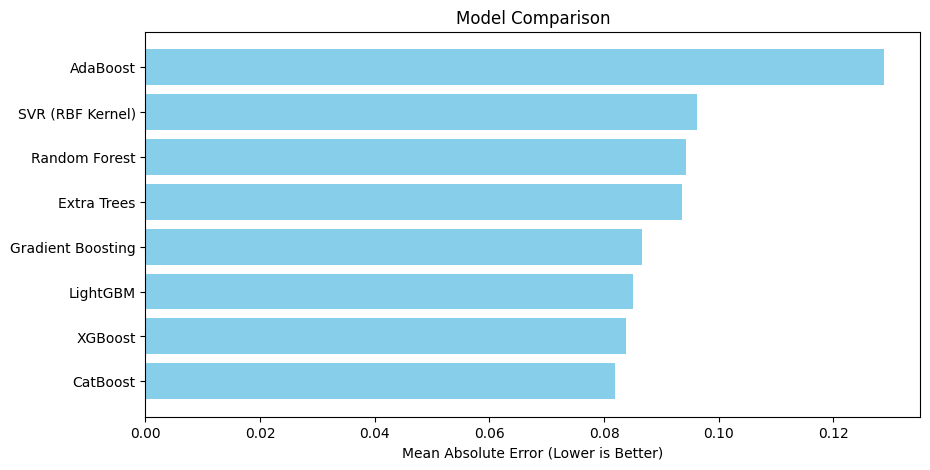

In [63]:
# Plot results
plt.figure(figsize=(10, 5))
plt.barh(list(sorted_results.keys()), list(sorted_results.values()), color='skyblue')
plt.xlabel("Mean Absolute Error (Lower is Better)")
plt.title("Model Comparison")
plt.show()


<!-- Stylish Objective and Problem Statement header -->
<div style="text-align: center; background: #3B6790; font-family: 'Trebuchet MS', Arial, sans-serif; color: white; padding: 15px; font-size: 26px; font-weight: bold; line-height: 1; border-radius: 50% 0 50% 0 / 40px; margin-bottom: 20px; box-shadow: 0px 4px 6px rgba(0, 0, 0, 0.1);">
  <h2 id="Hyperparameter-Tuning" style="margin: 0; font-size: 30px;">Hyperparameter Tuning</h2>
</div>


In [64]:
import optuna
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.model_selection import cross_val_score
import numpy as np

# Define the objective function for CatBoost
def objective_catboost(trial):
    params = {
        'iterations': trial.suggest_int('iterations', 100, 1000, step=100),
        'depth': trial.suggest_int('depth', 4, 10),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
        'l2_leaf_reg': trial.suggest_float('l2_leaf_reg', 1e-5, 10),
    }
    model = CatBoostRegressor(**params, verbose=0)
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_absolute_error')
    return -np.mean(scores)

# Define the objective function for XGBoost
def objective_xgboost(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000, step=100),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
    }
    model = XGBRegressor(**params)
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_absolute_error')
    return -np.mean(scores)

# Define the objective function for LightGBM
def objective_lightgbm(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000, step=100),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
        'num_leaves': trial.suggest_int('num_leaves', 20, 150),
    }
    model = LGBMRegressor(**params)
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_absolute_error')
    return -np.mean(scores)

# Run hyperparameter tuning
study_catboost = optuna.create_study(direction='minimize')
study_catboost.optimize(objective_catboost, n_trials=20)

study_xgboost = optuna.create_study(direction='minimize')
study_xgboost.optimize(objective_xgboost, n_trials=20)

study_lightgbm = optuna.create_study(direction='minimize')
study_lightgbm.optimize(objective_lightgbm, n_trials=20)

# Get best parameters
best_params_catboost = study_catboost.best_params
best_params_xgboost = study_xgboost.best_params
best_params_lightgbm = study_lightgbm.best_params

print("Best CatBoost Parameters:", best_params_catboost)
print("Best XGBoost Parameters:", best_params_xgboost)
print("Best LightGBM Parameters:", best_params_lightgbm)


[I 2025-02-26 15:13:28,173] A new study created in memory with name: no-name-60eeef24-a78f-4c09-88ee-eb53c132f1a0
[I 2025-02-26 15:14:14,698] Trial 0 finished with value: 0.08672351954056887 and parameters: {'iterations': 800, 'depth': 9, 'learning_rate': 0.19040001974462575, 'l2_leaf_reg': 9.70247913957544}. Best is trial 0 with value: 0.08672351954056887.
[I 2025-02-26 15:15:24,679] Trial 1 finished with value: 0.09004788770195785 and parameters: {'iterations': 700, 'depth': 10, 'learning_rate': 0.20976601135150097, 'l2_leaf_reg': 6.148877127096946}. Best is trial 0 with value: 0.08672351954056887.
[I 2025-02-26 15:15:25,972] Trial 2 finished with value: 0.09094533098078975 and parameters: {'iterations': 100, 'depth': 6, 'learning_rate': 0.07209412713487211, 'l2_leaf_reg': 7.776883405273668}. Best is trial 0 with value: 0.08672351954056887.
[I 2025-02-26 15:15:27,965] Trial 3 finished with value: 0.08747279354644241 and parameters: {'iterations': 100, 'depth': 7, 'learning_rate': 0.1

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000519 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3510
[LightGBM] [Info] Number of data points in the train set: 934, number of used features: 192
[LightGBM] [Info] Start training from score 12.029308
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

[I 2025-02-26 15:21:05,222] Trial 0 finished with value: 0.0925855074214588 and parameters: {'n_estimators': 400, 'max_depth': 3, 'learning_rate': 0.25065856807465864, 'num_leaves': 121}. Best is trial 0 with value: 0.0925855074214588.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-02-26 15:21:06,360] Trial 1 finished with value: 0.09005313209603025 and parameters: {'n_estimators': 300, 'max_depth': 8, 'learning_rate': 0.08387866073125204, 'num_leaves': 44}. Best is trial 1 with value: 0.09005313209603025.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-02-26 15:21:06,970] Trial 2 finished with value: 0.08865365219303582 and parameters: {'n_estimators': 300, 'max_depth': 4, 'learning_rate': 0.09214551696089789, 'num_leaves': 41}. Best is trial 2 with value: 0.08865365219303582.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-02-26 15:21:08,054] Trial 3 finished with value: 0.09032453633089434 and parameters: {'n_estimators': 300, 'max_depth': 9, 'learning_rate': 0.07675075601474315, 'num_leaves': 104}. Best is trial 2 with value: 0.08865365219303582.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000527 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if m

[I 2025-02-26 15:21:08,906] Trial 4 finished with value: 0.09299684715846718 and parameters: {'n_estimators': 400, 'max_depth': 4, 'learning_rate': 0.21350846981656993, 'num_leaves': 120}. Best is trial 2 with value: 0.08865365219303582.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-02-26 15:21:09,487] Trial 5 finished with value: 0.08826263244559195 and parameters: {'n_estimators': 300, 'max_depth': 3, 'learning_rate': 0.09346081984888001, 'num_leaves': 44}. Best is trial 5 with value: 0.08826263244559195.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-02-26 15:21:11,024] Trial 6 finished with value: 0.09148317162459221 and parameters: {'n_estimators': 1000, 'max_depth': 3, 'learning_rate': 0.16834061837833492, 'num_leaves': 78}. Best is trial 5 with value: 0.08826263244559195.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-02-26 15:21:11,892] Trial 7 finished with value: 0.09456078261382994 and parameters: {'n_estimators': 500, 'max_depth': 3, 'learning_rate': 0.2800642893130233, 'num_leaves': 78}. Best is trial 5 with value: 0.08826263244559195.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-02-26 15:21:14,994] Trial 8 finished with value: 0.09438895958056301 and parameters: {'n_estimators': 1000, 'max_depth': 6, 'learning_rate': 0.18734225339112942, 'num_leaves': 149}. Best is trial 5 with value: 0.08826263244559195.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-02-26 15:21:15,957] Trial 9 finished with value: 0.0948579855454383 and parameters: {'n_estimators': 600, 'max_depth': 3, 'learning_rate': 0.22710259556805418, 'num_leaves': 100}. Best is trial 5 with value: 0.08826263244559195.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-02-26 15:21:16,413] Trial 10 finished with value: 0.11635244955829352 and parameters: {'n_estimators': 100, 'max_depth': 6, 'learning_rate': 0.016690969916071996, 'num_leaves': 21}. Best is trial 5 with value: 0.08826263244559195.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000542 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3510
[LightGBM] [Info] Number of data points in the train set: 934, number of used features: 192
[LightGBM] [Info] Start training from score 12.029308
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

[I 2025-02-26 15:21:16,742] Trial 11 finished with value: 0.09019853083478772 and parameters: {'n_estimators': 100, 'max_depth': 5, 'learning_rate': 0.10390209378376898, 'num_leaves': 48}. Best is trial 5 with value: 0.08826263244559195.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-02-26 15:21:18,524] Trial 12 finished with value: 0.09141165148492096 and parameters: {'n_estimators': 700, 'max_depth': 5, 'learning_rate': 0.12491045024136896, 'num_leaves': 52}. Best is trial 5 with value: 0.08826263244559195.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-02-26 15:21:19,165] Trial 13 finished with value: 0.09001200808564283 and parameters: {'n_estimators': 200, 'max_depth': 5, 'learning_rate': 0.04077844047600801, 'num_leaves': 22}. Best is trial 5 with value: 0.08826263244559195.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-02-26 15:21:20,917] Trial 14 finished with value: 0.09031791850505971 and parameters: {'n_estimators': 700, 'max_depth': 4, 'learning_rate': 0.13434059760311853, 'num_leaves': 58}. Best is trial 5 with value: 0.08826263244559195.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-02-26 15:21:21,902] Trial 15 finished with value: 0.08940942685818347 and parameters: {'n_estimators': 300, 'max_depth': 7, 'learning_rate': 0.05204001369021161, 'num_leaves': 36}. Best is trial 5 with value: 0.08826263244559195.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000622 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3510
[LightGBM] [Info] Number of data points in the train set: 934, number of used features: 192
[LightGBM] [Info] Start training from score 12.029308
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

[I 2025-02-26 15:21:23,190] Trial 16 finished with value: 0.09050518776619337 and parameters: {'n_estimators': 500, 'max_depth': 4, 'learning_rate': 0.13402875566656364, 'num_leaves': 66}. Best is trial 5 with value: 0.08826263244559195.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-02-26 15:21:24,118] Trial 17 finished with value: 0.09186962471867348 and parameters: {'n_estimators': 200, 'max_depth': 10, 'learning_rate': 0.09294996087536511, 'num_leaves': 35}. Best is trial 5 with value: 0.08826263244559195.


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000550 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3496
[LightGBM] [Info] Number of data points in the train set: 935, number of used features: 190
[LightGBM] [Info] Start training from score 12.027653
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

[I 2025-02-26 15:21:26,548] Trial 18 finished with value: 0.09062715371314584 and parameters: {'n_estimators': 800, 'max_depth': 7, 'learning_rate': 0.05734605232633494, 'num_leaves': 67}. Best is trial 5 with value: 0.08826263244559195.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-02-26 15:21:27,759] Trial 19 finished with value: 0.09160521790791158 and parameters: {'n_estimators': 400, 'max_depth': 4, 'learning_rate': 0.012229198972607158, 'num_leaves': 94}. Best is trial 5 with value: 0.08826263244559195.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

In [65]:
best_params_xgboost


{'n_estimators': 1000,
 'max_depth': 3,
 'learning_rate': 0.04268756584882631,
 'subsample': 0.5952954774226467}

In [66]:

# Train models
catboost = CatBoostRegressor(**best_params_catboost, verbose=0)
catboost.fit(X_train, y_train)

xgboost = XGBRegressor(**best_params_xgboost)
xgboost.fit(X_train, y_train)

lightgbm = LGBMRegressor(**best_params_lightgbm)
lightgbm.fit(X_train, y_train)

# Predictions
catboost_preds = catboost.predict(X_valid)
xgboost_preds = xgboost.predict(X_valid)
lightgbm_preds = lightgbm.predict(X_valid)

# Evaluate
catboost_mae = mean_absolute_error(y_valid, catboost_preds)
xgboost_mae = mean_absolute_error(y_valid, xgboost_preds)
lightgbm_mae = mean_absolute_error(y_valid, lightgbm_preds)

# Print results
print(f'CatBoost MAE: {catboost_mae:.4f}')
print(f'XGBoost MAE: {xgboost_mae:.4f}')
print(f'LightGBM MAE: {lightgbm_mae:.4f}')


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000503 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3841
[LightGBM] [Info] Number of data points in the train set: 1168, number of used features: 200
[LightGBM] [Info] Start training from score 12.030652
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best

In [67]:
# Fill categorical columns with 'None'
for col in test.select_dtypes(include=['object']).columns:
    test[col] = test[col].fillna('None')

# Fill numerical columns with median
for col in test.select_dtypes(include=['int64', 'float64']).columns:
    test[col] = test[col].fillna(train[col].median())  # Use median from training data


In [68]:

test_preds = xgboost.predict(test)

test_preds = np.expm1(test_preds)

# Prepare the submission DataFrame
submission = pd.DataFrame({'Id': test_ids, 'SalePrice': test_preds})

# Save to CSV
submission.to_csv('submission.csv', index=False)

print("Submission file saved: submission.csv 🎯")


Submission file saved: submission.csv 🎯
